In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# Carregar os dados do CSV.
data = pd.read_csv("./data/treino_sinais_vitais_com_label.csv")

# Selecionar apenas as colunas relevantes (qPa, pulso, respiracao) e o rótulo
data = data[["qPa", "pulso", "respiracao", "rotulo"]]

# Tratar valores ausentes, se existirem
data = data.dropna()

# Dividir os dados em atributos (X) e rótulos (y)
X = data[["qPa", "pulso", "respiracao"]]
y = data["rotulo"]

# Normalizar os atributos para o intervalo [0, 1]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Configurar os parâmetros para experimentação
discretizations = [2,3,4,5,6,7,8]
max_depths = [3, 5, 8, 24, 32, None]
seeds = [3, 5, 7, 8, 9, 10]
min_samples_splits = [3, 4, 5, 6]

# Avaliar o modelo usando K-Fold
def evaluate_model(X, y, discretization, max_depth, seed, min_samples_split):
    kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
    model = DecisionTreeClassifier(
        criterion="entropy",
        max_depth=max_depth,
        random_state=seed,
        min_samples_split=min_samples_split
    )
    scores = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    return scores.mean()

# Testar combinações de parâmetros
results = []
for discretization in discretizations:
    for max_depth in max_depths:
        for seed in seeds:
            for min_samples_split in min_samples_splits:
                accuracy = evaluate_model(X, y, discretization, max_depth, seed, min_samples_split)
                results.append({
                    "Discretization": discretization,
                    "Max Depth": max_depth,
                    "Seed": seed,
                    "Min Samples Split": min_samples_split,
                    "Accuracy": accuracy
                })

# Mostrar os melhores resultados
results = sorted(results, key=lambda x: x["Accuracy"], reverse=True)
print("Top 5 Configurations:")
for result in results[:5]:
    print(result)

# Relatório final para a melhor configuração
best_config = results[0]
model = DecisionTreeClassifier(
    criterion="entropy",
    max_depth=best_config["Max Depth"],
    random_state=best_config["Seed"],
    min_samples_split=best_config["Min Samples Split"]
)
model.fit(X, y)

print("\nBest Model Configuration:")
print(best_config)

from sklearn.tree import export_text
print("\nDecision Tree:")
print(export_text(model, feature_names=["qPa", "pulso", "respiracao"]))


Top 5 Configurations:
{'Discretization': 2, 'Max Depth': 24, 'Seed': 7, 'Min Samples Split': 3, 'Accuracy': 0.9213333333333333}
{'Discretization': 2, 'Max Depth': 32, 'Seed': 7, 'Min Samples Split': 3, 'Accuracy': 0.9213333333333333}
{'Discretization': 2, 'Max Depth': None, 'Seed': 7, 'Min Samples Split': 3, 'Accuracy': 0.9213333333333333}
{'Discretization': 3, 'Max Depth': 24, 'Seed': 7, 'Min Samples Split': 3, 'Accuracy': 0.9213333333333333}
{'Discretization': 3, 'Max Depth': 32, 'Seed': 7, 'Min Samples Split': 3, 'Accuracy': 0.9213333333333333}

Best Model Configuration:
{'Discretization': 2, 'Max Depth': 24, 'Seed': 7, 'Min Samples Split': 3, 'Accuracy': 0.9213333333333333}

Decision Tree:
|--- respiracao <= 0.52
|   |--- qPa <= 0.77
|   |   |--- qPa <= 0.23
|   |   |   |--- pulso <= 0.77
|   |   |   |   |--- pulso <= 0.23
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pulso >  0.23
|   |   |   |   |   |--- pulso <= 0.61
|   |   |   |   |   |   |--- class: 2
|   |   |   |  


Decision Tree:
|--- respiracao <= 0.52
|   |--- qPa <= 0.77
|   |   |--- qPa <= 0.23
|   |   |   |--- pulso <= 0.77
|   |   |   |   |--- pulso <= 0.23
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- pulso >  0.23
|   |   |   |   |   |--- pulso <= 0.61
|   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- pulso >  0.61
|   |   |   |   |   |   |--- respiracao <= 0.43
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- respiracao >  0.43
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |--- pulso >  0.77
|   |   |   |   |--- class: 1
|   |   |--- qPa >  0.23
|   |   |   |--- pulso <= 0.61
|   |   |   |   |--- pulso <= 0.22
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- pulso >  0.22
|   |   |   |   |   |--- qPa <= 0.74
|   |   |   |   |   |   |--- qPa <= 0.39
|   |   |   |   |   |   |   |--- pulso <= 0.49
|   |   |   |   |   |   |   |   |--- pulso <= 0.35
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |---

/home/hellhat/.local/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


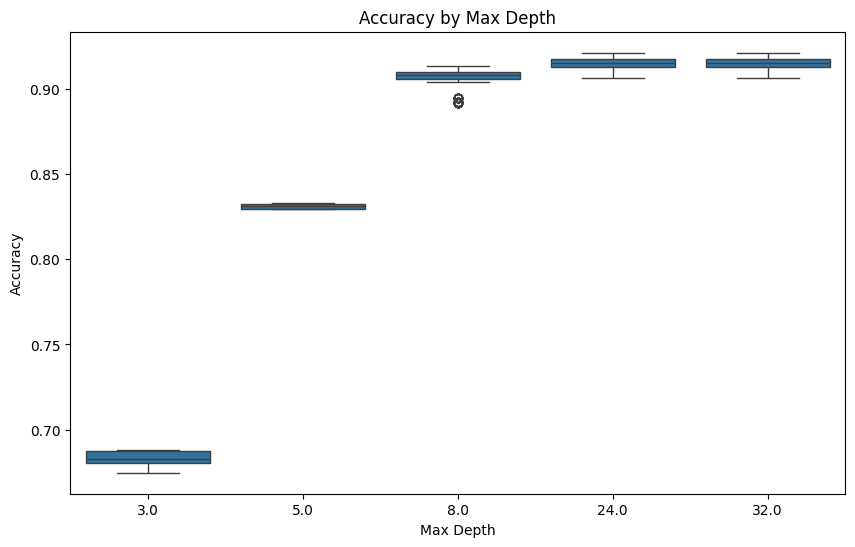

/home/hellhat/.local/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


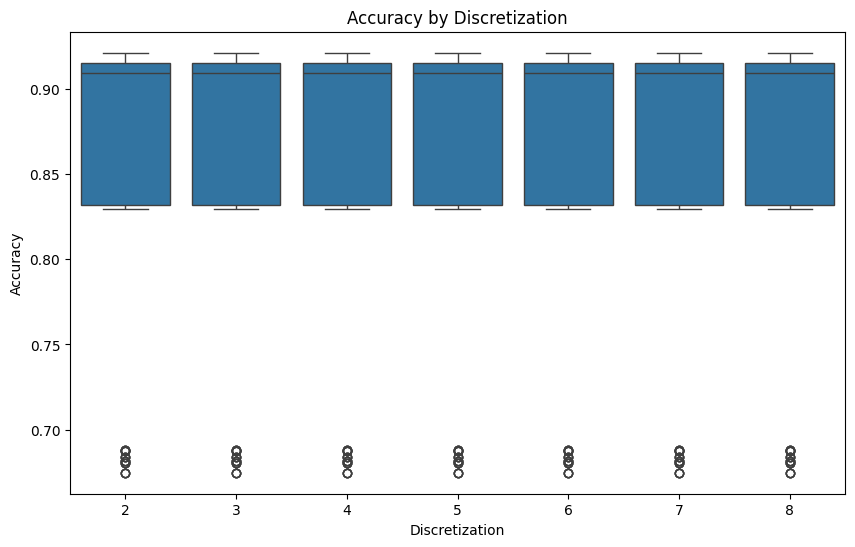

/home/hellhat/.local/lib/python3.11/site-packages/seaborn/categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


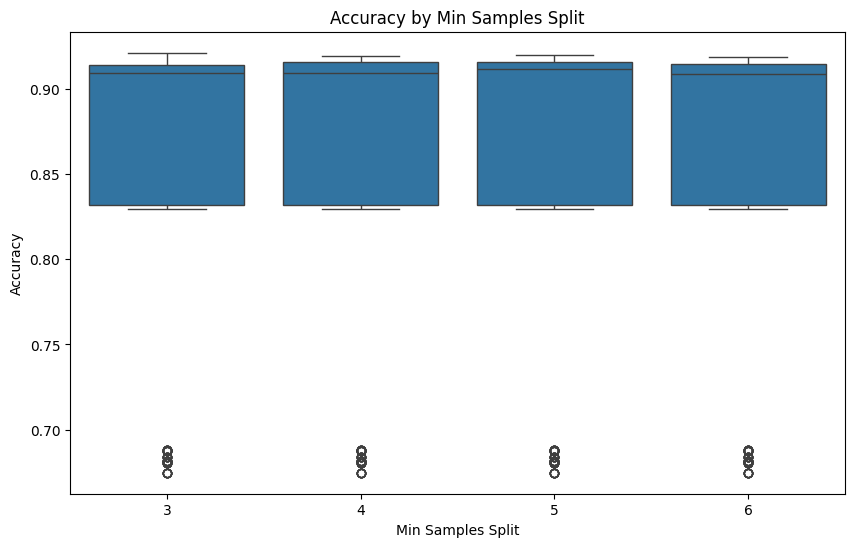

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_text
print("\nDecision Tree:")
print(export_text(model, feature_names=["qPa", "pulso", "respiracao"]))

# Gerar gráficos de comparação
df_results = pd.DataFrame(results)

# Gráfico de acurácia por profundidade máxima
plt.figure(figsize=(10, 6))
sns.boxplot(x="Max Depth", y="Accuracy", data=df_results)
plt.title("Accuracy by Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.show()

# Gráfico de acurácia por discretização
plt.figure(figsize=(10, 6))
sns.boxplot(x="Discretization", y="Accuracy", data=df_results)
plt.title("Accuracy by Discretization")
plt.xlabel("Discretization")
plt.ylabel("Accuracy")
plt.show()

# Gráfico de acurácia por mínimo de amostras para divisão
plt.figure(figsize=(10, 6))
sns.boxplot(x="Min Samples Split", y="Accuracy", data=df_results)
plt.title("Accuracy by Min Samples Split")
plt.xlabel("Min Samples Split")
plt.ylabel("Accuracy")
plt.show()
